In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
%matplotlib nbagg

In [430]:
#r = [x1, y1, z1, vx1, vx2, vx3, x2, y2, z2, vx2, vy2, vz2,...] arrreglar
def n_body_diff_ec2(t, r, ms, G=1):
    #Number of bodies. For each body there must be 6 ecuations,
    #3 for the position (x, y, z) and 3 for the velocity (vx, vy, vz).
    n = 6
    N = int(len(r)/n)
    
    ecs = np.zeros(len(r))
    
    for i in range(N):
        dvdt_i = [0, 0, 0]
        
        for j in range(N):
            if i != j:
                d = np.sqrt((r[6*j+0]-r[6*i+0])**2 +
                            (r[6*j+1]-r[6*i+1])**2 +
                            (r[6*j+2]-r[6*i+2])**2 )
        
                for k in range(3):
                    dvdt_i[k] += G*ms[j]*( r[6*j+k] - r[6*i+k] ) / d**3

                    
        for l in range(3):
            ecs[6*i + l] = r[6*i + 6 + l]
            ecs[6*i + 3 + l] = dvdt_i[l]          
            
    return ecs

#r = [x1, y1, z1, x2, y2, z2, vx1, vy1, vz1, vx2, vy2, vz2,...]
def n_body_diff_eq(t, r, ms, G=1):
    #Number of bodies. For each body there must be 6 ecuations,
    #3 for the position (x, y, z) and 3 for the velocity (vx, vy, vz).
    n = 6
    N = int(len(r)/n)
    
    ecs = np.zeros(len(r))
    
    for i in range(N):
        dvdt_i = [0, 0, 0]
        
        for j in range(N):
            if i != j:
                d = np.sqrt((r[3*j+0]-r[3*i+0])**2 +
                            (r[3*j+1]-r[3*i+1])**2 +
                            (r[3*j+2]-r[3*i+2])**2 )
        
                for k in range(3):
                    dvdt_i[k] += G*ms[j]*( r[3*j+k] - r[3*i+k] ) / d**3

        
        for l in range(3):
            ecs[3*i + l] = r[3*i + 6 + l]
            ecs[3*i + 6 + l] = dvdt_i[l]          
            
    return ecs

In [448]:
ts = np.linspace(0,1, 10000)
r = [0,0,0,1,0,0] + [0,-1,0,0,1,0]
ms = [10,2]

In [449]:
sol = odeint(n_body_diff_eq, y0=r, t=ts, args=(ms,), tfirst=True )

In [450]:
sol.shape

(10000, 12)

<IPython.core.display.Javascript object>


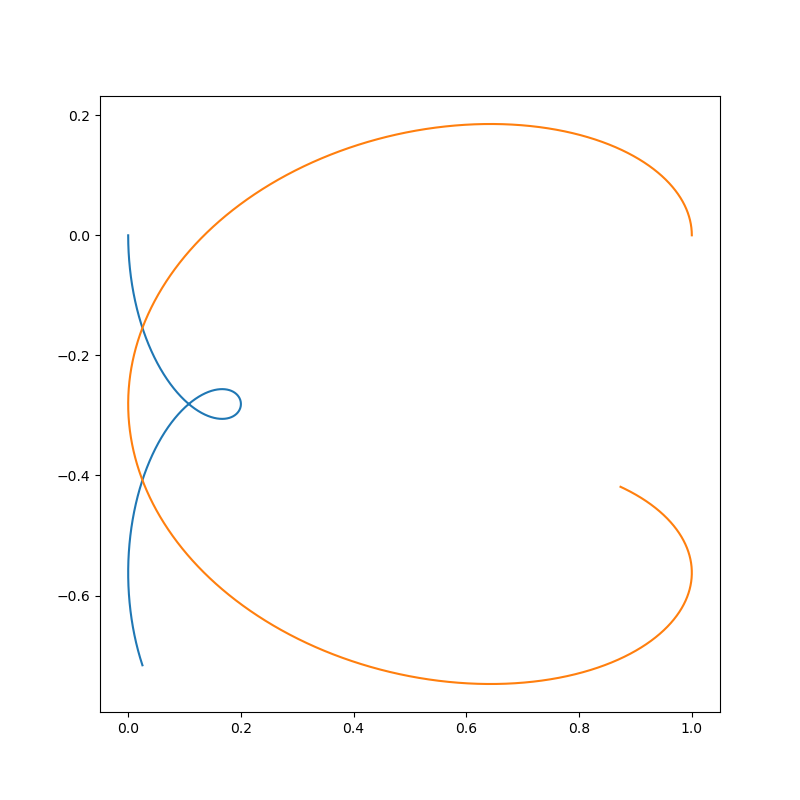

In [451]:
fig = plt.figure(figsize=(8,8))
plt.plot(sol.T[0], sol.T[1], "-")
plt.plot(sol.T[3], sol.T[4], "-")